<a href="https://colab.research.google.com/github/shivendr7/ml/blob/main/CNNforDigitsMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keras provides built in access classes for MNIST. It is important to note that MNIST data arrives already separated into two sets:

train - Neural network will be trained with this.

test - Used for validation.

In [ ]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train.shape,x_test.shape,y_train.shape,y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
#display digits
from IPython.display import display
import pandas as pd

pd.set_option('display.max_columns',15)
pd.set_option('display.max_rows',5)

display(x_train[0].shape)
pd.DataFrame(x_train[0])

(28, 28)

,0,1,2,3,4,5,6,...,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0


(60000, 28, 28)

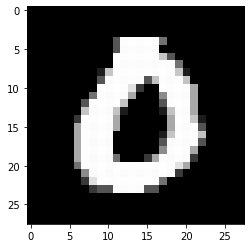

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
digit=4123
a=x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
display(x_train.shape)
#np.asarray(x_train[digit])

<Figure size 432x288 with 0 Axes>

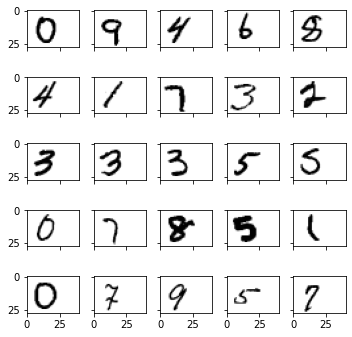

In [ ]:
import random
R=5
random_indices= random.sample(range(x_train.shape[0]),R*R)  #R*R samples generated from given range
sample_images= x_train[random_indices, :]
plt.clf()

fig, axes= plt.subplots(R, R, figsize=(R, R), sharex=True, sharey=True)

for i in range(R*R):
  subplot_row = i//R
  subplot_col = i%R
  ax= axes[subplot_row, subplot_col]


  plottable_image= np.reshape(sample_images[i,:], (28,28))
  ax.imshow(plottable_image, cmap='gray_r')

  ax.set_xbound([0,40])

plt.tight_layout()
plt.show()

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

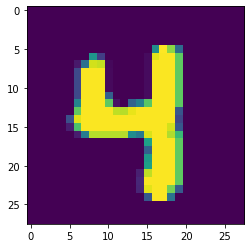

In [ ]:
display(x_train[0,:])
#ax.imshow(plottable_image, cmap='gray_r')
plt.imshow(x_train[58,:])

Training Models


In [ ]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [ ]:
batch_size= 128
num_classes=10
epochs=12

#input dimensions
img_rows, img_cols= 28,28

if K.image_data_format()== 'channels_first':
  x_train = x_train.reshape(x_train.shape[0],1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0],1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255 

In [ ]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#setting up the model
model= Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

The following code will train the CNN for 20,000 steps. This can take awhile, you might want to scale the step count back. GPU training can help. My results:

CPU Training Time: Elapsed time: 1:50:13.10

GPU Training Time: Elapsed time: 0:13:43.06

In [ ]:
import tensorflow as tf
import time

start_time = time.time()
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_test, y_test))
score=model.evaluate(x_test, y_test, verbose=0)
elapsed_time=time.time()-start_time
print(score,elapsed_time)

Epoch 1/12
469/469 - 10s - loss: 0.2323 - accuracy: 0.9292 - val_loss: 0.0530 - val_accuracy: 0.9827
Epoch 2/12
469/469 - 3s - loss: 0.0818 - accuracy: 0.9749 - val_loss: 0.0388 - val_accuracy: 0.9864
Epoch 3/12
469/469 - 3s - loss: 0.0636 - accuracy: 0.9813 - val_loss: 0.0360 - val_accuracy: 0.9875
Epoch 4/12
469/469 - 3s - loss: 0.0514 - accuracy: 0.9844 - val_loss: 0.0318 - val_accuracy: 0.9899
Epoch 5/12
469/469 - 3s - loss: 0.0424 - accuracy: 0.9869 - val_loss: 0.0354 - val_accuracy: 0.9892
Epoch 6/12
469/469 - 3s - loss: 0.0373 - accuracy: 0.9884 - val_loss: 0.0332 - val_accuracy: 0.9892
Epoch 7/12
469/469 - 3s - loss: 0.0352 - accuracy: 0.9882 - val_loss: 0.0293 - val_accuracy: 0.9903
Epoch 8/12
469/469 - 3s - loss: 0.0306 - accuracy: 0.9900 - val_loss: 0.0290 - val_accuracy: 0.9912
Epoch 9/12
469/469 - 3s - loss: 0.0271 - accuracy: 0.9909 - val_loss: 0.0298 - val_accuracy: 0.9924
Epoch 10/12
469/469 - 3s - loss: 0.0256 - accuracy: 0.9915 - val_loss: 0.0284 - val_accuracy: 0.991

In [ ]:
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.03188647702336311
Test accuracy: 0.9911999702453613


In [ ]:
np.argmax(model.predict(x_train)[58])

4